In [9]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_list = []
june_list = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [10]:
# 2. Convert the June temperatures to a list.
june_temps = list(june_list)

In [11]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_temps, columns=['date','June Temps'])
df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [12]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [13]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_list = []
december_list = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [14]:
# 7. Convert the December temperatures to a list.
december_temps = list(december_list)

In [15]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df1 = pd.DataFrame(december_temps, columns = ["date", "December Temps"])
df1

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [16]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df1.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date'>

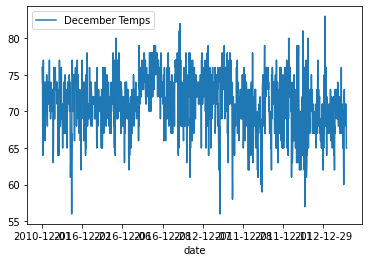

In [18]:
df1.plot(x= "date", y="December Temps")

<AxesSubplot:xlabel='date'>

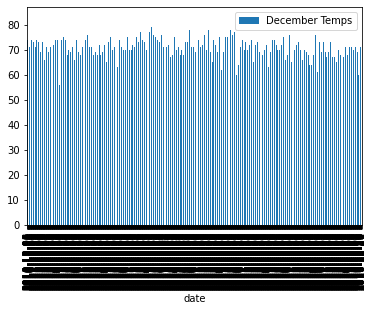

In [19]:
df1.plot.bar(x= "date", y="December Temps")